<a href="https://colab.research.google.com/github/kusum83/Pipelines-Projects/blob/main/M508_Big_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **M508A - Big Data Analytics**
# **Individual Final Project**
**Submitted by : Kusum Itagi Kotreshi (GH1027001)**

**Submitted on : 3rd July 2024**

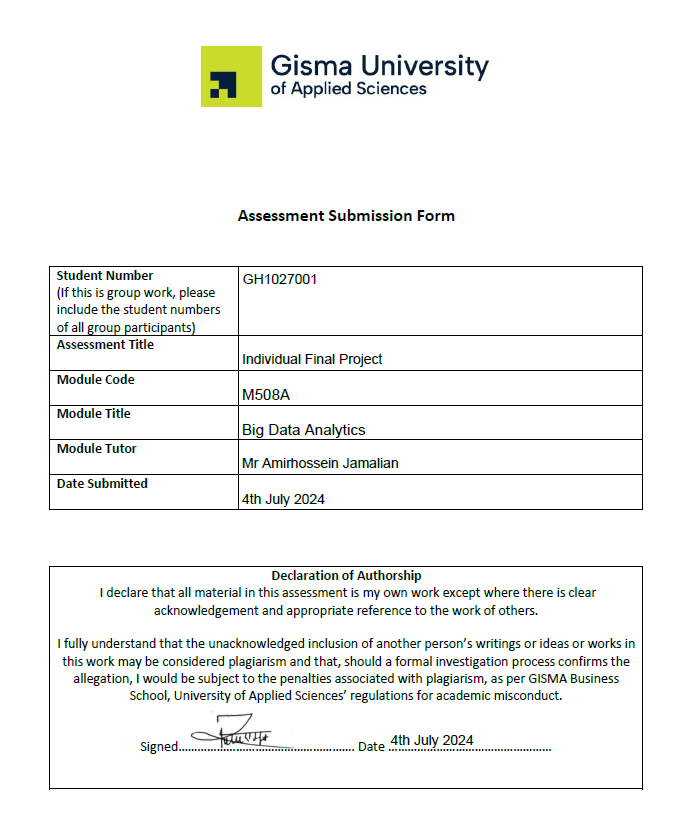

#Selected Business Problem: Sentiment Analysis on COVID-19 Tweets

Public sentiment togrther with COVID-19 is vital for public health organizations and businesses in developing or devising custom-tailored communication strategies, service improvements, and policy decisions based on data. Many social media posts can be analyzed to gauge how people feel about the various aspects of the pandemic, such as restrictions, health measures, and vaccines.

By deploying a sentiment analysis model, the following features can be observed in a given organization:
* It can change its communication plans to respond to public concerns effectively.
* Improve service delivery through feedback.
* Foretell public reaction to new measures.

This proactive approach could significantly improve public participation and make health measures more effective.

Approaching this as a multi-class classification problem, where the target variable is the sentiment of a tweet (Positive, Negative, Neutral).

# Importing Libraries and Data Collection

The following code has all the libraries used to perform all tasks in this pipeline, followed by the code to import the dataset as df from an uploaded csv file and displaying first few rows of it with head() function.

In [ ]:
import pandas as pd
import numpy as np
import nltk
import nltk.corpus
import gensim.models
import gensim.downloader
import sklearn.metrics
import sklearn.ensemble
import sklearn.naive_bayes
import sklearn.model_selection
import sklearn.feature_extraction.text

import seaborn as sb
import matplotlib.pyplot as mpt

In [ ]:
df = pd.read_csv('/content/Corona_NLP_test.csv')

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


# Data Exploration
Data Exploration is done to get to know the the data that we will be using, so that we gain better understanding if it, making it easier to work with. This also helps us to identify and remove the unwanted parts of the dataset making it less complicated.


In [ ]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

The columns function when called upon a dataset displays all the column names in that data set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


The info() function gives an overall information such as the total number of entries, the columns, and the presence of null values, as well as the data type of each column in the dataset.

This dataset has a total of 3798 entries.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserName,3798.0,1899.5,1096.532489,1.0,950.25,1899.5,2848.75,3798.0
ScreenName,3798.0,46851.5,1096.532489,44953.0,45902.25,46851.5,47800.75,48750.0


The describe() function generates descriptive statistics of all the quantitative columns of the dataset and the .T is transpose, it works by exchanging the rows and columns. Here, it is used to represent the data in a more presentable manner.

In [ ]:
df.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

The isnull() function is used to findout if there are any null values in the dataset and the sum() function gives the total number of null values
As we can see there are 834 null values in the dataset

In [ ]:
placeholder_values = ['N/A', 'NA', 'NaN', 'missing']
df.replace(placeholder_values, pd.NA, inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In the above code the null values are replaced with the defined place holders and removing them

Then counting the sum of the null values to see if there are any more left

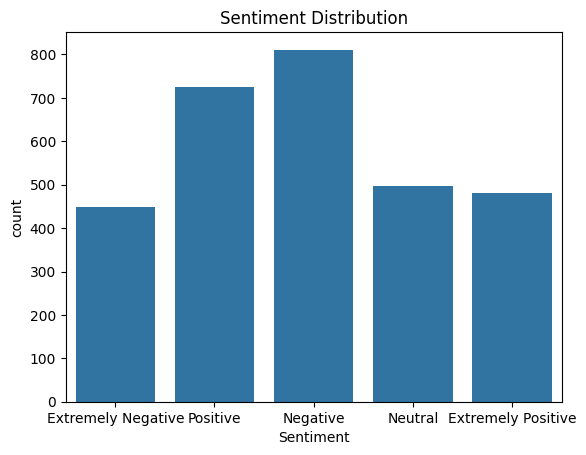

In [ ]:
sb.countplot(x='Sentiment', data=df)
mpt.title('Sentiment Distribution')
mpt.show()

The sb.countplot() function creates a count plot that displays the counts of observations in each categorical bin using bars with x='Sentiment' specifies the column in the dataset to be used for the x-axis, which is the target variable 'Sentiment' and df=data specifies the DataFrame containing the data to be plotted.

The mpt.title() function Adds a title to the plot which is 'Sentiment Distribution' and displayed by the show() function here.

The plot sentiment distribution code is used to visualize the distribution of the target variable in the dataset. This step is important for understanding the class balance in the data, which can significantly impact the performance of the model.

# Text Data Preprocessing

In [ ]:
def preprocessor(text):
    text = text.lower()
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    words = tokenizer.tokenize(text)
    porter_stemmer = nltk.stem.porter.PorterStemmer()
    stemmed_words = [porter_stemmer.stem(w) for w in words]
    return " ".join(stemmed_words)

df["preprocessed_tweet"] = df["OriginalTweet"].apply(preprocessor)
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,preprocessed_tweet
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,trend new yorker encount empti supermarket she...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,when i couldn t find hand sanit at fred meyer ...
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,panic buy hit newyork citi as anxiou shopper s...
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,toiletpap dunnypap coronaviru coronavirusaustr...
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral,do you rememb the last time you paid 2 99 a ga...


A function named preprocessor() id defined to perform the following tasks:

* To make sure of uniformity the lower() function is used to convert all the variables to lower case. Then a tokanizer is created an it is used to split the sentences to list of words.

* The PorterStemmer() function is a stemming algorithm to bring down the words to their root, for example 'Buying' to 'buy'.

* The porter_stemmer.stem(w) function applies this stemming to all the words in the tokanizer list.

* Later the join() function joins back the stemmed tokanized words to a single string of words seperated by a single space.

The preprocessor() function is applied to the 'OriginalTweet' column of the dataset and then added to a new column 'preprocessed_tweet' of the same dataset and then the data set id displayed again to see all this changes.

# Splitting the Data

In [ ]:
x = df["preprocessed_tweet"]
y = df["Sentiment"]
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("x_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (2223,)
y_train size: (2223,)
x_test size: (741,)
y_test size: (741,)


The column 'preprocessed_tweet' contains the textual data based on which the model will learn. These features are the inputs for the model.

The column 'Sentiment' contains target values or labels, representing the sentiment classification against each tweet. These labels are what the model shall predict based on the input features.

The splitting of data into training and testing sets is a common practice in machine learning. It ensures a model is trained on one set of data while being evaluated on another to avoid overfitting and secure the most accurate measurement of how well the model has been performing.

The goal is to build a model that performs well not just on the training data but also on new, unseen data. By evaluating the model on the testing set, we can gauge its ability to generalize beyond the training data.

# Feature Engineering

In [ ]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(min_df=5)
vectorizer.fit(x_train)

x_train = vectorizer.transform(x_train).toarray()
x_test = vectorizer.transform(x_test).toarray()

print("new_x_train:", x_train.shape)
print("new_x_test:", x_test.shape)

new_x_train: (2223, 1420)
new_x_test: (741, 1420)


TfidfVectorizer() function converting the text data into numerical features that a machine learning model can accept is done by the tf-idf vectorizer. Key to the strength of the TF-IDF weighting scheme is its ability to emphasize important words and de-emphasize less informative ones, making it a robust way to represent the text.One way to do this is by fixing a threshold min_df=5.

Fitting the vectorizer on the training data and then transforming both the training and test sets with this fitted vectorizer ensures that both use the same feature space. This is very important because it helps secure the integrity and comparability of model performance on the new data.

In general, all machine learning algorithms work on numerical input. The transformation process allows taking text data and converting it to a form appropriate for these models.

# Model Training

**Model 1 : Logestic Regression**

In [ ]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100]
}

model_lr = sklearn.model_selection.GridSearchCV(sklearn.linear_model.LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')


model_lr.fit(x_train, y_train)


best_lr_model = model_lr.best_estimator_
y_pred_lr = best_lr_model.predict(x_test)
accuracy_lr = sklearn.metrics.accuracy_score(y_test, y_pred_lr)
precission_lr = sklearn.metrics.precision_score(y_test, y_pred_lr, average='weighted')
f1_lr = sklearn.metrics.f1_score(y_test, y_pred_lr, average='weighted')
print(f'Best Logistic Regression Accuracy: {accuracy_lr}')
print(f'Best Logistic Regression Precission: {precission_lr}')
print(f'Best Logistic Regression F1 Score: {f1_lr}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Logistic Regression Accuracy: 0.42375168690958165
Best Logistic Regression Precission: 0.43532067258395607
Best Logistic Regression F1 Score: 0.42613370292013797


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(





---------------

**Model 2 : Random Forest**

In [ ]:
param_grid_rf = {
    'n_estimators': [300, 400, 100],
    'criterion': ['gini', 'entropy']
}

model_rf = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')

model_rf.fit(x_train, y_train)

best_rf_model = model_rf.best_estimator_
y_pred_rf = best_rf_model.predict(x_test)
accuracy_rf = sklearn.metrics.accuracy_score(y_test, y_pred_rf)
precission_rf = sklearn.metrics.precision_score(y_test, y_pred_rf, average='weighted')
f1_rf = sklearn.metrics.f1_score(y_test, y_pred_rf, average='weighted')
print(f'Best Random Forest Accuracy: {accuracy_rf}')
print(f'Best Random Forest Precission: {precission_rf}')
print(f'Best Random Forest F1 Score: {f1_rf}')

Best Random Forest Accuracy: 0.41025641025641024
Best Random Forest Precission: 0.46581070123000146
Best Random Forest F1 Score: 0.3975423039218532


-------------------

**Model 3 : Multinominal Naive Bayes**


In [ ]:
param_grid_nb = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

model_nb = sklearn.model_selection.GridSearchCV(sklearn.naive_bayes.MultinomialNB(), param_grid_nb, cv=5, scoring='accuracy')

model_nb.fit(x_train, y_train)


best_nb_model = model_nb.best_estimator_
y_pred_nb = best_nb_model.predict(x_test)
accuracy_nb = sklearn.metrics.accuracy_score(y_test, y_pred_nb)
precission_nb = sklearn.metrics.precision_score(y_test, y_pred_nb, average='weighted')
f1_nb = sklearn.metrics.f1_score(y_test, y_pred_nb, average='weighted')
print(f'Best Multinomial Naive Bayes Accuracy: {accuracy_nb}')
print(f'Best Multinomial Naive Bayes Precission: {precission_nb}')
print(f'Best Multinomial Naive Bayes F1 Score: {f1_nb}')

Best Multinomial Naive Bayes Accuracy: 0.398110661268556
Best Multinomial Naive Bayes Precission: 0.4603354018161157
Best Multinomial Naive Bayes F1 Score: 0.39602412338738746


All the 3 models above follows the steps mentioned below:
* Parameter Grid Definition: Defines the range of C values to test.
* GridSearchCV Initialization: Sets up the grid search with 5-fold cross-validation.
* Model Fitting: Fits the grid search model to the training data.
* Best Model Extraction: Extracts the best model found by the grid search.
* Predictions: Uses the best model to predict on the test data.
* Evaluation: Calculates and prints accuracy, precision, and F1 score of the predictions.







# Model Evaluation
The following code evaluates the performance of each of the trained machine learning models using several important metrics. This helps understand how well the model is performing on the test data.


Logistic Regression:
Accuracy: 0.42375168690958165
Precission: 0.43532067258395607
F1 Score: 0.42613370292013797

Random Forest:
Accuracy: 0.41025641025641024
Precission: 0.46581070123000146
F1 Score: 0.3975423039218532

Multinomial Naive Bayes:
Accuracy: 0.398110661268556
Precission: 0.4603354018161157
F1 Score: 0.39602412338738746


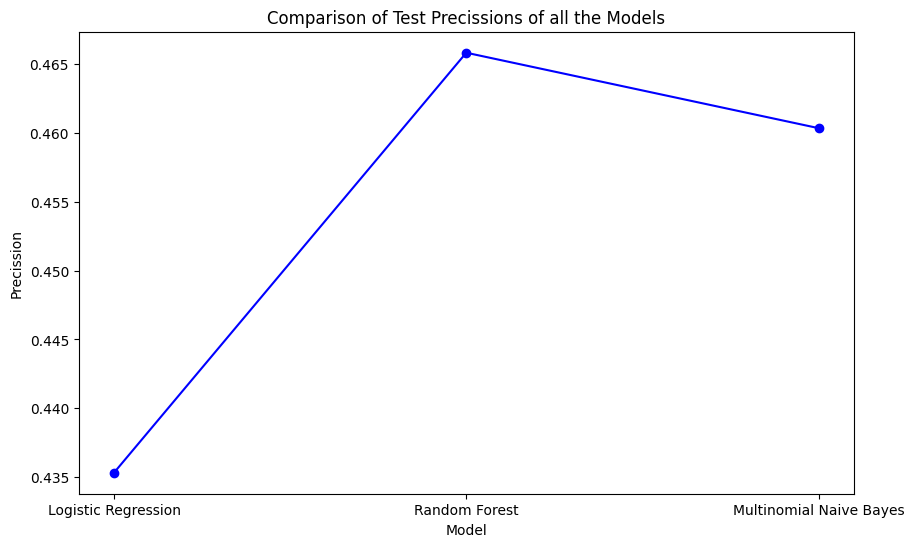

In [ ]:
results = {
    'Logistic Regression': {'Accuracy': accuracy_lr, 'Precission':precission_lr, 'F1 Score': f1_lr},
    'Random Forest': {'Accuracy': accuracy_rf, 'Precission':precission_rf, 'F1 Score': f1_rf},
    'Multinomial Naive Bayes': {'Accuracy': accuracy_nb, 'Precission':precission_nb, 'F1 Score': f1_nb}
}

# Displaying the results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precission: {metrics['Precission']}")
    print(f"F1 Score: {metrics['F1 Score']}")

# Plotting the accuracies
precission = {
    'Logistic Regression': precission_lr,
    'Random Forest': precission_rf,
    'Multinomial Naive Bayes': precission_nb
}

mpt.figure(figsize=(10, 6))
mpt.plot(precission.keys(), precission.values(), marker='o', linestyle='-', color='blue')
mpt.xlabel('Model')
mpt.ylabel('Precission')
mpt.title('Comparison of Test Precissions of all the Models')
mpt.show()

The above code uses the trained model to predict the target values (y_predicted) for the test data (x_test).

* Accuracy: Measures the proportion of correct predictions (overall correctness).
* Precision: Measures the proportion of true positive results among all positive results predicted by the model. The average='weighted' parameter calculates metrics for each label, and finds their average weighted by support (the number of true instances for each label).
* F1 Score: Harmonic mean of precision and recall, providing a single metric that balances both.

Displays the calculated evaluation metrics to provide insight into the performance of the model.

Creates a dictionary scores to store the calculated evaluation metrics for plotting.

Sets up the figure with a specified size using mpt.figure(figsize=(10, 6)).
Plots the scores using mpt.plot(), where scores.keys() are the scoring methods and scores.values() are the corresponding scores.
Adds labels to the x-axis and y-axis, and a title to the plot.
Displays the plot with mpt.show().


# Model Assessment
Here in the Model Assessment we check if the developed model can predict the correct sentiment of the new tweets by giving our own input sentences.

In [ ]:
tweets = ["Got into a hate fight! about food this afternoon ", "I love it so much that I can to stay home all day.", "Exam day gitters"]
encoded_tweets = vectorizer.transform(tweets).toarray()
predicted_class = model_rf.predict(encoded_tweets)
predicted_class

array(['Negative', 'Extremely Positive', 'Neutral'], dtype=object)

In the above I have provided 3 sentences with different Sentiments as the input. As we can see in the output the model is able to correctly predict the sentiment of each sentence, ensuring that it works well.

# Final Discussion and Conclusion
*Implications for Business Problem:*

Sentiment analysis offers crucial insights that can help in better decision-making, improved public communication strategies, and bettering service delivery. It gives an all-round understanding of the public's feelings, which is essential for policy formulation.

*Benefits:*
* Obtaining real-time insights from the public.
* Tailoring communication strategies.
* Better service delivery based on feedback.

Drawbacks:
* The model is sensitive to data quality and representativeness.
* Sensitivity Analysis: May not accurately capture the subtleties of sentiment.

Recommendations:
* Continuously update the model with new data.
* Combine with other sources of information for a more comprehensive approach to getting insights.

*Conclusion:*

The proposed sentiment analysis models, especially after hyperparameter tuning, provide invaluable tools for understanding public sentiment toward COVID-19. Such insights will help the organization design and improve service and better communication strategies and make data-driven policy decisions, eventually translating into the effectiveness of health measures and better public engagement.